# Ciência dos Dados
## Projeto 2 - Walmart
### Integrantes do Grupo:

* Antônio Amaral Egydio Martins
* Arthur Martins de Souza Barreto

### Professor Orientador:
* Maria Kelly Venezuela

### Proposta Norteadora:

Buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos entre 5/2/2010 até 1/11/2012. Sendo assim para este trabalho utilizaremos como Feature interna o ID da loja - que pode impactas nas vendas por existirem diferentes lojas em diferentes locais… - e como Features Externas os índices CPI (Prevailing consumer price index), Fuel Price, Unemployment e Temperature que afetam diretamente o bem estar e poder aquisitivo do consumidor - podendo aumentar ou reduzir seu consumo semanal.

### Introdução
#### `Importando bibliocas utilizadas:`

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import random

#### `Importando base de dados`

In [46]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\arthu\Desktop\Documentos\Insper\2º_Periodo\Ciencia_dos_dados\Formula1


In [47]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### `Checando o  DataFrame`

**Dicionário de dados:**


Variável | Descrição
:---:|---:
Store | ID de Reconhecimento das Lojas
Weekly_Sales | Vendas Semanais
Holiday_Flag | Variavel Booleana para Feriados 
Temperature | Temperatura Exterior as lojas (Fahrenheit)
Fuel_Price | Preço do Galão de Combustivel (USD)
Prevailing consumer price index | Unidade utilizada para medir inflação
Unemployment | Taxa de Desemprego (%)


A variável *Holiday_Flag* identifica se é feriado ou não.

Valor | Significado
:---:|:---:
0 | É Feriado
1 | Não é Feriado

#### Vamos analizar as variaveis quantitativas

In [48]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Verificando valores nulos:

In [49]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Impressões inciais
O dataframe está ok para a analize exploratória. 

### Analise exploratória
#### Plot Gráfico Temporais
Nesta Seção será realizado o Plot de gráficos com relação ao tempo das <b>Features</b>:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

O objeto desta analise inicial é observar a progressão e variação das Features presentes no DataFrame a fim de gerar hipoteses sobre o comportamento destas variaveis.

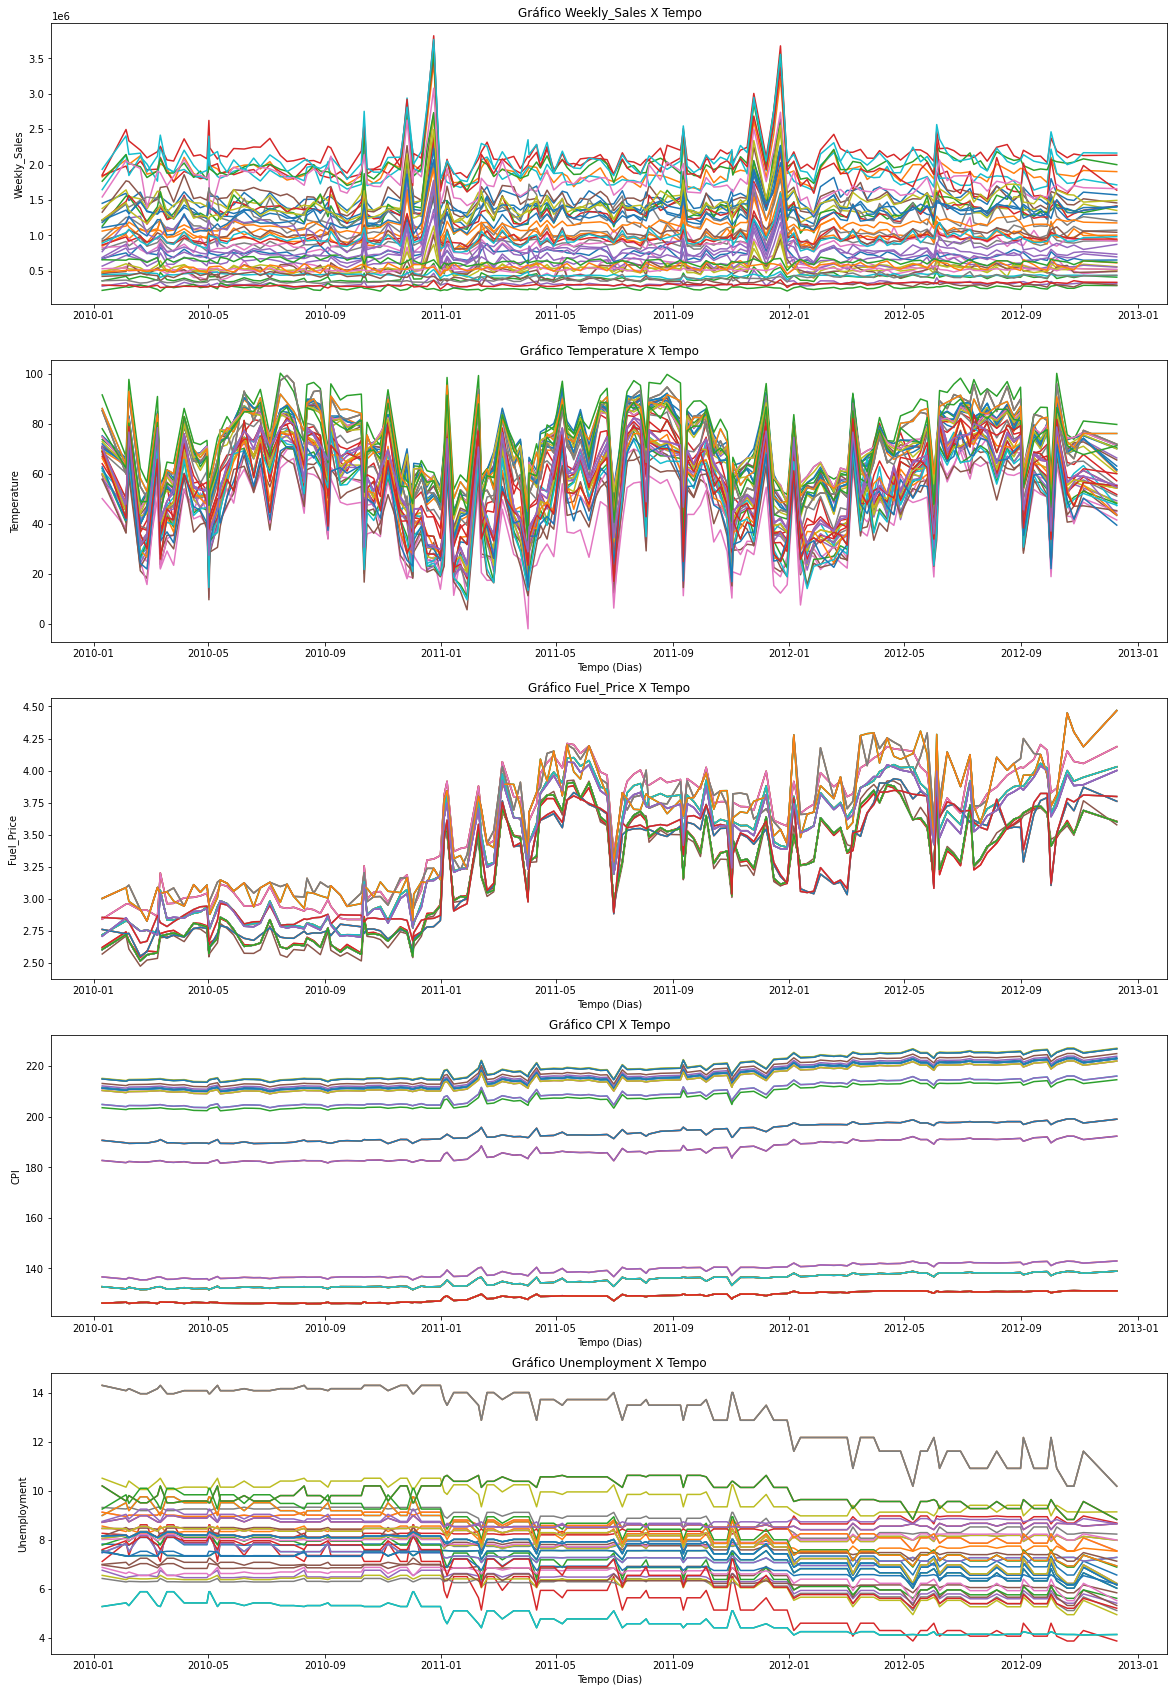

In [50]:
df.Date = pd.to_datetime(df.Date)
df_ordenado = df.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        dados_loja = df_ordenado.loc[df['Store'] == loja]
        plt.plot(dados_loja.Date, dados_loja[variavel])
        plt.title(f"Gráfico {variavel} X Tempo")
        plt.ylabel(variavel)
        plt.xlabel("Tempo (Dias)")
    index += 1
plt.show()

#### Plot de Gráficos Relativos à Target
Nesta Seção será realizado o Plot de gráficos da <b>Target</b> em relaçnao as <b>Features</b>:
* `Holiday_Flag`
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

O objeto desta analise é observar a progressão e variação das Features presentes no DataFrame a fim de gerar correlações comportamentais destas em relação a variavel principal. 

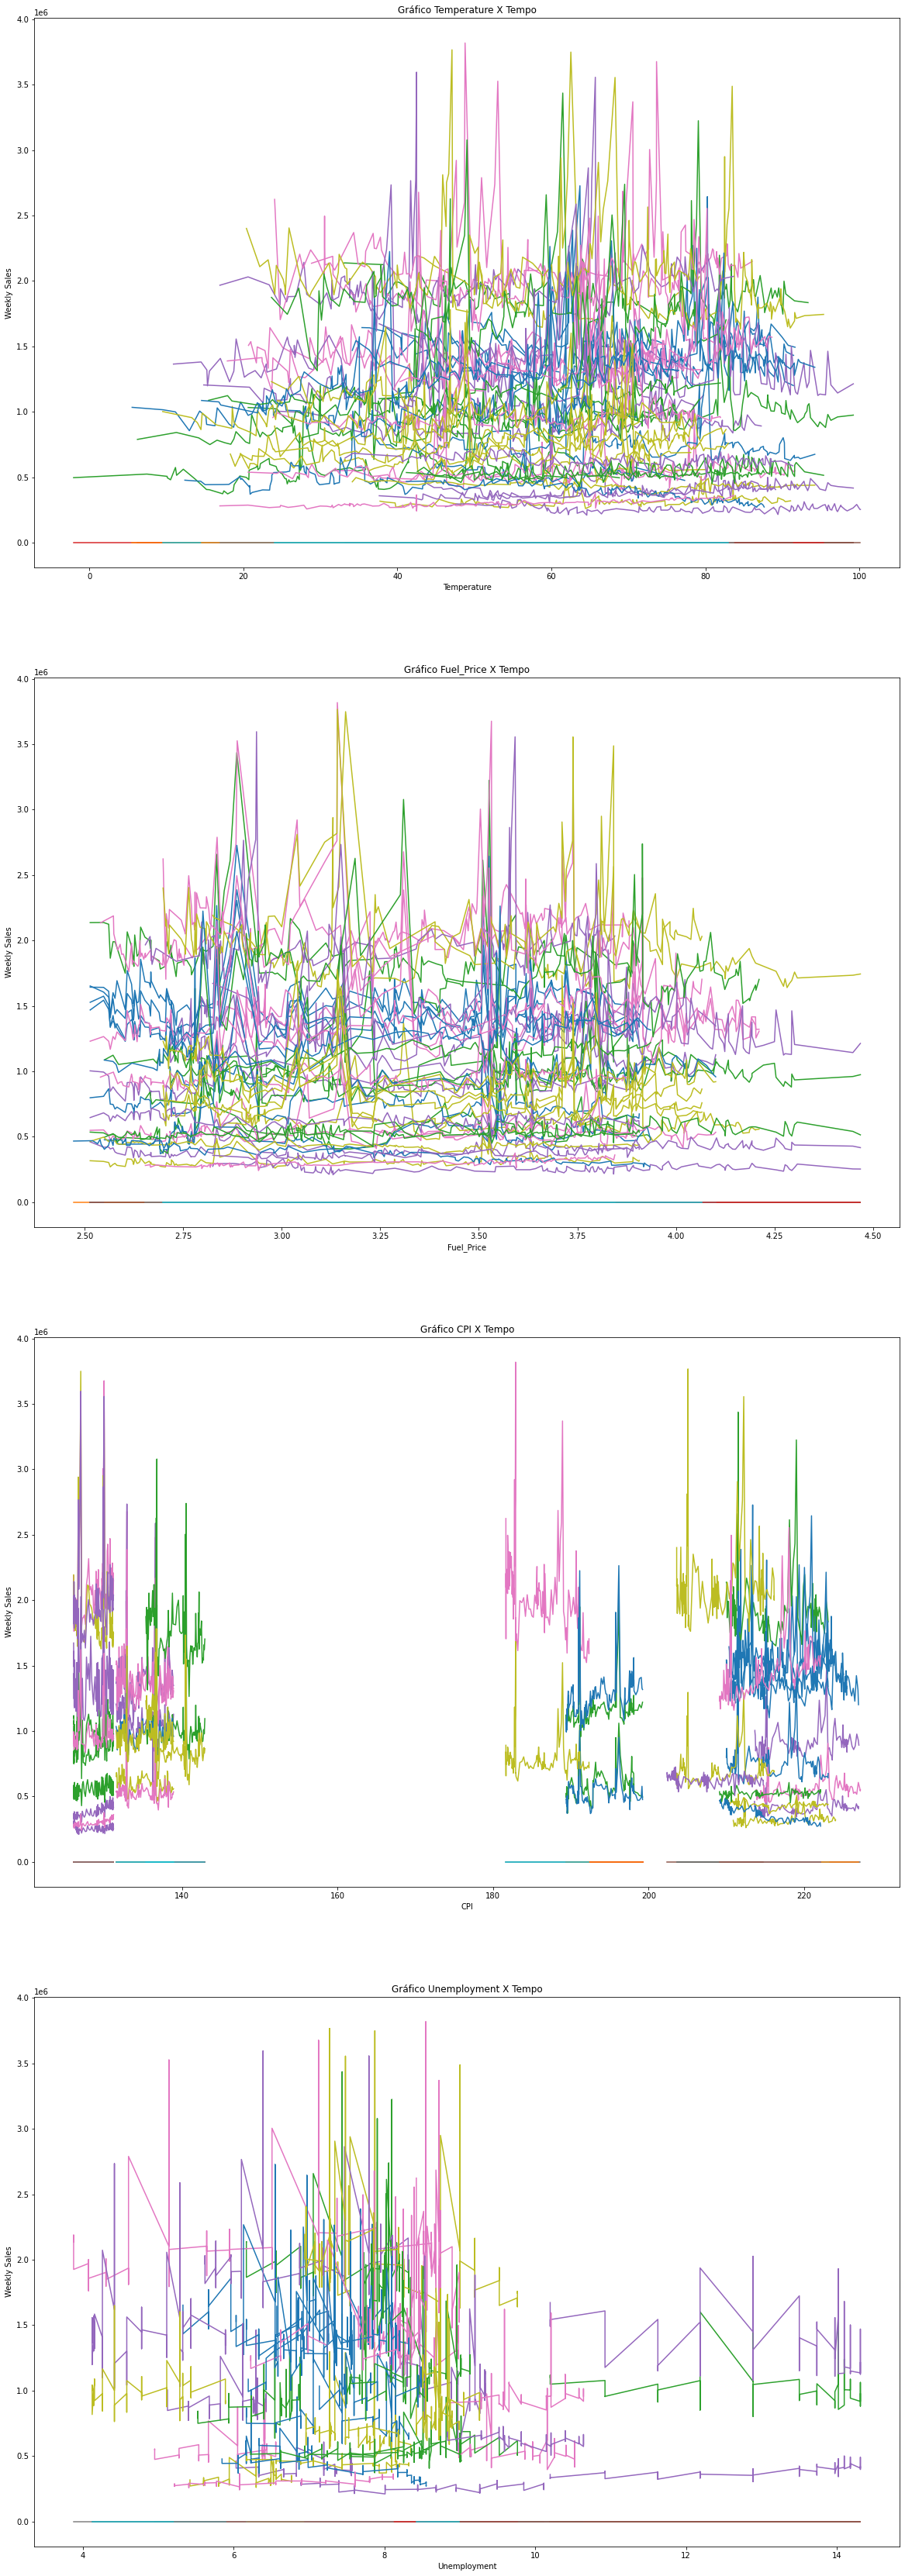

In [51]:

# vamos filtrar o dataframe, em um vetor X deixaremos as variaveis que supostamente afetam a variavel target
X_list = ["Temperature","Fuel_Price","CPI","Unemployment"]
# em Y precisamos colocar a variavel target e store, para darmos um loc por loja
Y = df[["Weekly_Sales",'Store']]

# organizando o subplot
l_subplots = [411,412,413,414]
plt.figure(figsize = (20,60))

index = 0
for variavel in X_list:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        # variavel aux para filtrar por loja
        aux = df.loc[df['Store'] == loja]
        # filtrar a variavel x por loja e ordenar os valores para o plot
        XLinha = aux[variavel].sort_values()
        # filtrar a variavel target por loja
        YLinha = Y.loc[Y['Store'] == loja]
        # dando o plot
        plt.plot(XLinha,YLinha)
        plt.title(f"Gráfico {variavel} X Tempo")
        plt.ylabel("Weekly Sales")
        plt.xlabel(variavel)
    # mudando de variavel a ser analizada
    index += 1
plt.show()

#### Analise de Resultados

Após o Plot de gráficos Temporais e Relativos ao Target foi percebido que para ser realizado o projeto respondendo com satisfação a problematica proposta no inicio deste arquivo, entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos, há a necessidade de agrupar os dados via datas, para assim possibilitar uma visão geral de vendas, possibilitando a analise de iten

In [54]:
# removendo a coluna que indentica as lojas
dfc = df.drop('Store', axis = 1)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [69]:
# agora vamos agrupar pelas datas semanis
dfc.groupby(by = dfc.Date, axis = 1)

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'